In [28]:
# Run this cell to install necessary libraries
#%pip install torch torchvision
#%pip install Augmentor
#%pip install tensorflow
# %pip install mlxtend
%pip install seaborn


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 288.2/288.2 kB 4.4 MB/s eta 0:00:00


## Data Preprocressing

In [59]:
#https://neptune.ai/blog/data-augmentation-in-python
import Augmentor

p = Augmentor.Pipeline("../data/asl_alphabet_train/asl_alphabet_train")

Initialised with 87000 image(s) found.
Output directory set to ../data/asl_alphabet_train/asl_alphabet_train\output.

In [60]:
p.random_brightness(probability = 0.3, min_factor=0.4, max_factor=0.9) # darken images
p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6) # zoom in on images

In [61]:
p.status()

Operations: 2
	0: RandomBrightness (probability=0.3 min_factor=0.4 max_factor=0.9 )
	1: Zoom (probability=0.3 min_factor=1.1 max_factor=1.6 )
Images: 87000
Classes: 29
	Class index: 0 Class label: A 
	Class index: 1 Class label: B 
	Class index: 2 Class label: C 
	Class index: 3 Class label: D 
	Class index: 4 Class label: E 
	Class index: 5 Class label: F 
	Class index: 6 Class label: G 
	Class index: 7 Class label: H 
	Class index: 8 Class label: I 
	Class index: 9 Class label: J 
	Class index: 10 Class label: K 
	Class index: 11 Class label: L 
	Class index: 12 Class label: M 
	Class index: 13 Class label: N 
	Class index: 14 Class label: O 
	Class index: 15 Class label: P 
	Class index: 16 Class label: Q 
	Class index: 17 Class label: R 
	Class index: 18 Class label: S 
	Class index: 19 Class label: T 
	Class index: 20 Class label: U 
	Class index: 21 Class label: V 
	Class index: 22 Class label: W 
	Class index: 23 Class label: X 
	Class index: 24 Class label: Y 
	Class index: 25 

In [62]:
p.sample(100000)

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x260BF864F70>: 100%|██████████| 100000/100000 [14:40<00:00, 113.53 Samples/s]                  


In [63]:
import tensorflow as tf
import pathlib

directory = pathlib.Path('../data/asl_alphabet_train/asl_alphabet_train/output')
training = tf.keras.utils.image_dataset_from_directory(
    directory,
    validation_split = 0.1,
    subset="training",
    seed=200,
    image_size = (200, 200),
    labels="inferred",
    label_mode="categorical"
)

testing = tf.keras.utils.image_dataset_from_directory(
    directory,
    validation_split = 0.1,
    subset="validation",
    seed=200,
    image_size = (200, 200),
    labels="inferred",
    label_mode="categorical"
)


Found 100000 files belonging to 29 classes.
Using 90000 files for training.
Found 100000 files belonging to 29 classes.
Using 10000 files for validation.


In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D


model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size = 2, strides = 2))

model.add(Conv2D(32,3,padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size = 2, strides = 2))

model.add(Conv2D(32,3,padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size = 2, strides = 2))

model.add(Conv2D(32,3,padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size = 2, strides = 2))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(29, activation = "softmax")) # 29 classes

loss = 'categorical_crossentropy'
model.compile(loss = loss, optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0005), metrics = ['accuracy'])
model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 25, 25, 32)     

In [74]:
epoch = 3

data = model.fit(
    training,
    epochs = epoch,
    validation_data = testing,
)

trainAccuracy = data.history['accuracy']
trainLoss = data.history['loss']
testAccuracy = data.history['val_accuracy']
testLoss = data.history['val_loss']

Epoch 1/3
2813/2813 [==============================] - 2173s 772ms/step - loss: 1.3218 - accuracy: 0.6307 - val_loss: 0.4415 - val_accuracy: 0.8712
Epoch 2/3
2813/2813 [==============================] - 1997s 710ms/step - loss: 0.3812 - accuracy: 0.8860 - val_loss: 0.2194 - val_accuracy: 0.9376
Epoch 3/3
2813/2813 [==============================] - 1983s 705ms/step - loss: 0.2374 - accuracy: 0.9272 - val_loss: 0.1799 - val_accuracy: 0.9447


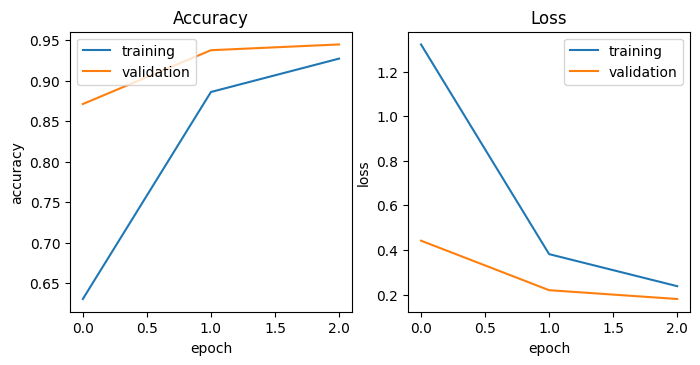

In [75]:
import matplotlib.pyplot as plt

epochRange = range(epoch)
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.plot(epochRange, trainAccuracy, label='training')
plt.plot(epochRange, testAccuracy, label='validation')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochRange, trainLoss, label='training')
plt.plot(epochRange, testLoss, label='validation')
plt.legend(loc='upper right')
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

1/1 [==============================] - 0s 251ms/step


<AxesSubplot:>

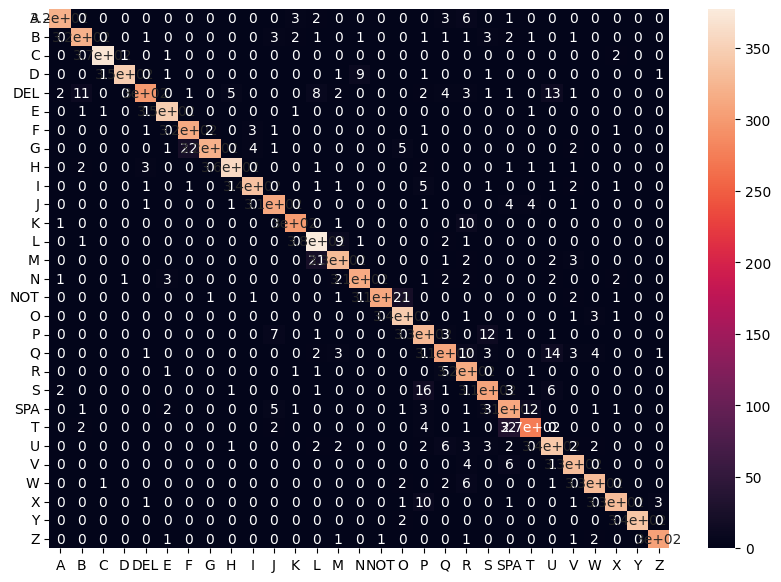

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

y_true = []
y_pred = []
for x,y in testing:
  y= tf.argmax(y,axis=1)
  y_true.append(y)
  y_pred.append(tf.argmax(model.predict(x),axis = 1))
  
y_pred = tf.concat(y_pred, axis=0)
y_true = tf.concat(y_true, axis=0)

conf_matrix =  tf.math.confusion_matrix(labels = y_true, predictions = y_pred)
df_cm = pd.DataFrame(conf_matrix, index = [i for i in ['A', 'B', 'C', 'D', 'DEL', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'NOT', 'O', 'P', 'Q', 'R', 'S', 'SPA', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']],
                  columns = [i for i in ['A', 'B', 'C', 'D', 'DEL', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'NOT', 'O', 'P', 'Q', 'R', 'S', 'SPA', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)


In [51]:
from sklearn.metrics import f1_score
print(f1_score(y_true, y_pred,average='weighted'))

0.9582716607438079
